In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


In [4]:
df.shape

(3337, 20)

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [10]:
new_columns = [col.replace(" ", "_").lower() for col in df.columns]
new_columns

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn']

In [11]:
df.columns = new_columns
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3337 non-null   object 
 1   account_length          3337 non-null   int64  
 2   area_code               3337 non-null   int64  
 3   international_plan      3336 non-null   object 
 4   voice_mail_plan         3334 non-null   object 
 5   number_vmail_messages   3337 non-null   int64  
 6   total_day_minutes       3330 non-null   float64
 7   total_day_calls         3335 non-null   float64
 8   total_day_charge        3332 non-null   float64
 9   total_eve_minutes       3334 non-null   float64
 10  total_eve_calls         3336 non-null   float64
 11  total_eve_charge        3327 non-null   float64
 12  total_night_minutes     3331 non-null   float64
 13  total_night_calls       3337 non-null   int64  
 14  total_night_charge      3335 non-null   

In [13]:
df.isnull().sum()

state                      0
account_length             0
area_code                  0
international_plan         1
voice_mail_plan            3
number_vmail_messages      0
total_day_minutes          7
total_day_calls            2
total_day_charge           5
total_eve_minutes          3
total_eve_calls            1
total_eve_charge          10
total_night_minutes        6
total_night_calls          0
total_night_charge         2
total_intl_minutes         1
total_intl_calls           1
total_intl_charge          1
customer_service_calls     0
churn                      8
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3337 non-null   object 
 1   account_length          3337 non-null   int64  
 2   area_code               3337 non-null   int64  
 3   international_plan      3336 non-null   object 
 4   voice_mail_plan         3334 non-null   object 
 5   number_vmail_messages   3337 non-null   int64  
 6   total_day_minutes       3330 non-null   float64
 7   total_day_calls         3335 non-null   float64
 8   total_day_charge        3332 non-null   float64
 9   total_eve_minutes       3334 non-null   float64
 10  total_eve_calls         3336 non-null   float64
 11  total_eve_charge        3327 non-null   float64
 12  total_night_minutes     3331 non-null   float64
 13  total_night_calls       3337 non-null   int64  
 14  total_night_charge      3335 non-null   

In [15]:
df["area_code"] = df["area_code"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3337 non-null   object 
 1   account_length          3337 non-null   int64  
 2   area_code               3337 non-null   object 
 3   international_plan      3336 non-null   object 
 4   voice_mail_plan         3334 non-null   object 
 5   number_vmail_messages   3337 non-null   int64  
 6   total_day_minutes       3330 non-null   float64
 7   total_day_calls         3335 non-null   float64
 8   total_day_charge        3332 non-null   float64
 9   total_eve_minutes       3334 non-null   float64
 10  total_eve_calls         3336 non-null   float64
 11  total_eve_charge        3327 non-null   float64
 12  total_night_minutes     3331 non-null   float64
 13  total_night_calls       3337 non-null   int64  
 14  total_night_charge      3335 non-null   

In [16]:
df.describe(include=["float64", "int64"])

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3337.000000,3337.000000,3330.000000,3335.000000,3332.000000,3334.000000,3336.000000,3327.000000,3331.000000,3337.000000,3335.000000,3336.000000,3336.000000,3336.000000,3337.000000
mean,101.076116,8.089302,179.682793,100.459670,30.551357,200.994691,100.090228,17.079387,200.833473,100.102188,9.037601,10.236661,4.478417,2.764284,1.563680
std,39.814327,13.683027,54.490775,20.051975,9.258336,50.688619,19.939487,4.309460,50.569425,19.574292,2.274813,2.791527,2.460753,0.753731,1.315458
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.600000,87.000000,24.410000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.350000,101.000000,30.500000,201.400000,100.000000,17.110000,201.100000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.200000,114.000000,36.755000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
df["churn"].value_counts(normalize=True)

False    0.854911
True     0.145089
Name: churn, dtype: float64

In [20]:
df["churn"] = df["churn"].astype("int64", errors='ignore')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


In [22]:
duplicates = df[df.duplicated()]
duplicates

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
157,MS,162,415,No,No,0,70.7,108.0,12.02,157.5,87.0,13.39,154.8,82,6.97,9.1,3.0,2.46,4,True
252,MI,105,510,No,No,0,140.6,109.0,23.90,178.6,51.0,15.18,217.0,83,9.76,6.8,3.0,1.84,2,False
327,SC,78,510,No,No,0,168.3,110.0,28.61,221.2,73.0,18.80,241.0,136,10.85,12.5,1.0,3.38,1,False


             value
count  3330.000000
mean    179.682793
std      54.490775
min       0.000000
25%     143.600000
50%     179.350000
75%     216.200000
max     350.800000


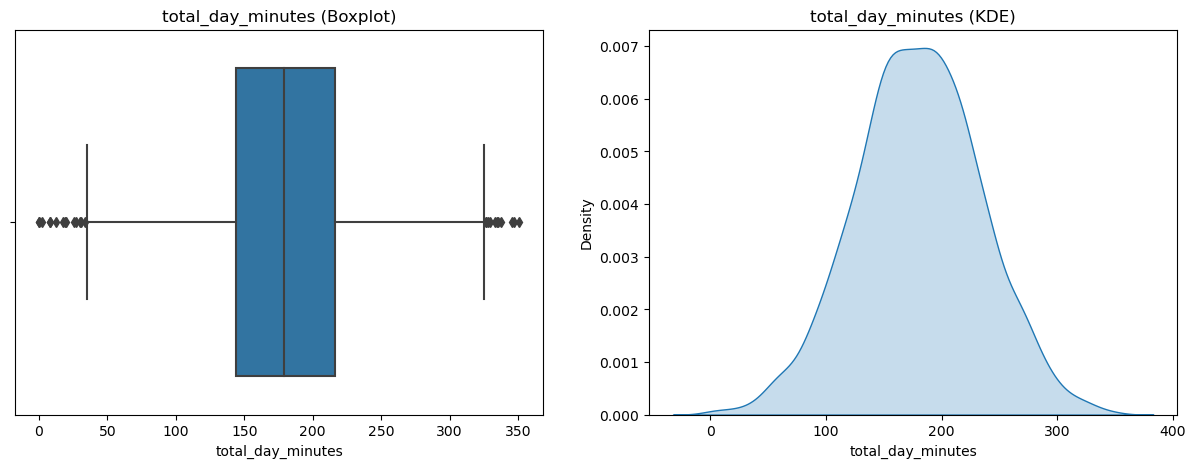

In [23]:
def numeric_univariate(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Description
    description = df[column].describe(include="all")
    describe_df = pd.DataFrame(description)
    describe_df.columns = ["value"]
    print(describe_df)

    # Boxplot
    sns.boxplot(ax=axes[0], data=df, x=column)
    axes[0].set_title(f"{column} (Boxplot)")

    # Distribution
    sns.kdeplot(ax=axes[1], data=df, x=column, shade=True)
    axes[1].set_title(f"{column} (KDE)")
    plt.show()

numeric_univariate("total_day_minutes")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3337 non-null   object 
 1   account_length          3337 non-null   int64  
 2   area_code               3337 non-null   object 
 3   international_plan      3336 non-null   object 
 4   voice_mail_plan         3334 non-null   object 
 5   number_vmail_messages   3337 non-null   int64  
 6   total_day_minutes       3330 non-null   float64
 7   total_day_calls         3335 non-null   float64
 8   total_day_charge        3332 non-null   float64
 9   total_eve_minutes       3334 non-null   float64
 10  total_eve_calls         3336 non-null   float64
 11  total_eve_charge        3327 non-null   float64
 12  total_night_minutes     3331 non-null   float64
 13  total_night_calls       3337 non-null   int64  
 14  total_night_charge      3335 non-null   

             value
count  3334.000000
mean    200.994691
std      50.688619
min       0.000000
25%     166.600000
50%     201.400000
75%     235.300000
max     363.700000


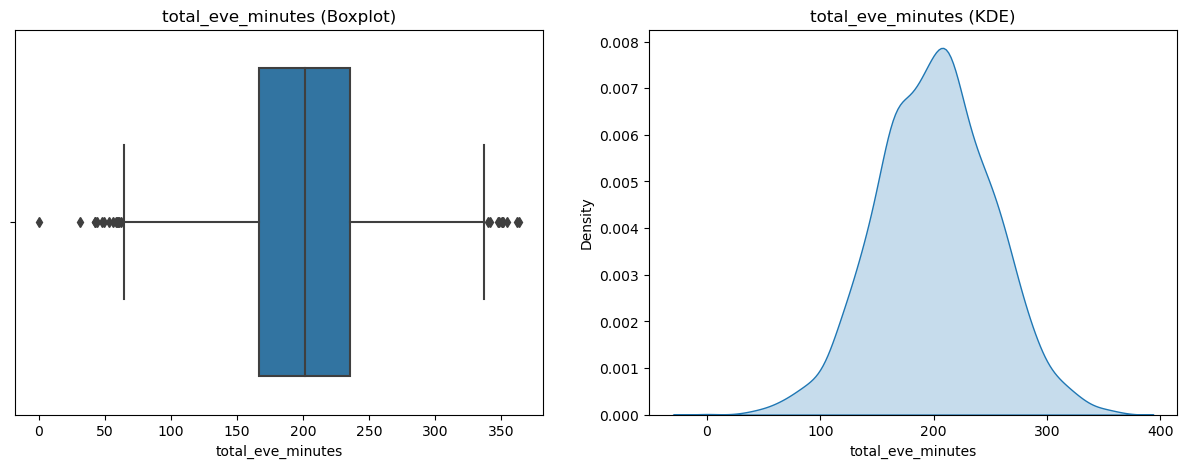

In [25]:
numeric_univariate("total_eve_minutes")

In [26]:
df_cat = df[[col for col in df.columns if df[col].dtype=="object"]]

In [27]:
df_cat.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OH,408,Yes,No,False
4,OK,415,Yes,No,False


In [28]:
df_cat["voice_mail_plan"].value_counts()

No     2413
Yes     921
Name: voice_mail_plan, dtype: int64

In [49]:
df = df.dropna(axis=0)

In [55]:
def detect_outliers(col):
    const = 1.5
    iqr = scipy.stats.iqr(df[col]) * const
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    lower = q1 - iqr
    upper = q3 + iqr
    return lower, upper

In [56]:
lower, upper = detect_outliers("total_day_minutes")

In [57]:
lower

34.51250000000003

In [58]:
upper

325.2125

In [59]:
outliers = df[(df["total_day_minutes"] < lower) | (df["total_day_minutes"] > upper)]
outliers

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
15,NY,161,415,No,No,0,332.9,67.0,56.59,317.8,97.0,27.01,160.6,128,7.23,5.4,9.0,1.46,4,True
158,OH,83,415,No,No,0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0,True
199,TX,208,510,No,No,0,326.5,67.0,55.51,176.3,113.0,14.99,181.7,102,8.18,10.7,6.0,2.89,2,True
369,CO,154,415,No,No,0,350.8,75.0,59.64,216.5,94.0,18.40,253.9,100,11.43,10.1,9.0,2.73,1,True
609,MO,112,415,No,No,0,335.5,77.0,57.04,212.5,109.0,18.06,265.0,132,11.93,12.7,8.0,3.43,2,True
689,CO,63,415,No,Yes,32,30.9,113.0,5.25,187.0,113.0,15.90,230.8,101,10.39,8.6,7.0,2.32,1,False
745,NE,66,415,No,No,0,34.0,133.0,5.78,278.6,61.0,23.68,129.6,120,5.83,11.5,3.0,3.11,0,False
979,DE,129,510,No,No,0,334.3,118.0,56.83,192.1,104.0,16.33,191.0,83,8.59,10.4,6.0,2.81,0,True
989,NY,64,415,Yes,No,0,346.8,55.0,58.96,249.5,79.0,21.21,275.4,102,12.39,13.3,9.0,3.59,1,True
1056,OR,98,415,Yes,No,0,12.5,67.0,2.13,256.6,90.0,21.81,169.4,88,7.62,7.7,9.0,2.08,1,False


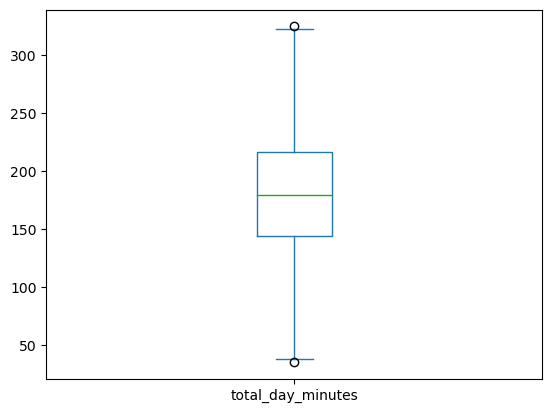

In [61]:
cleaned = df[(df["total_day_minutes"] < upper) & (df["total_day_minutes"] > lower)]
cleaned["total_day_minutes"].plot(kind="box")
plt.show()

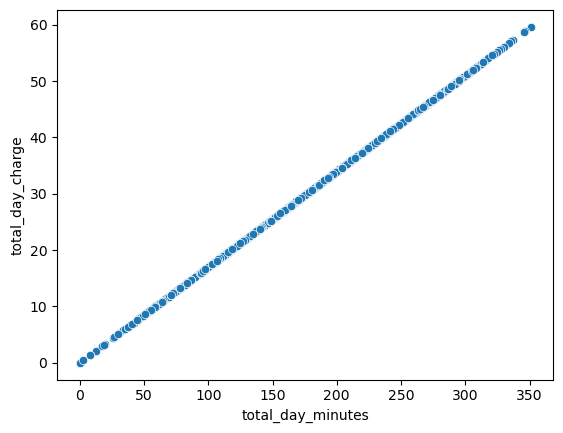

In [62]:
sns.scatterplot(x='total_day_minutes', y='total_day_charge', data=df)
plt.show()

In [63]:
df.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
account_length,1.000000,-1.181687e-03,0.004144,0.037301,0.004144,-0.004489,0.017293,-0.004476,-0.009506,-0.015853,-0.009514,0.012005,0.022807,1.203578e-02,-0.002006
number_vmail_messages,-0.001182,1.000000e+00,0.000844,-0.011320,0.000841,0.018311,-0.001415,0.018327,0.006288,0.006840,0.006273,-0.000040,0.012790,1.129217e-07,-0.013324
total_day_minutes,0.004144,8.439790e-04,1.000000,0.006585,1.000000,0.006721,0.017390,0.006704,0.006566,0.022536,0.006548,-0.010849,0.009012,-1.079704e-02,-0.015974
total_day_calls,0.037301,-1.132020e-02,0.006585,1.000000,0.006587,-0.021735,0.005646,-0.021734,0.023438,-0.016137,0.023424,0.020671,0.006298,2.077210e-02,-0.015507
total_day_charge,0.004144,8.407464e-04,1.000000,0.006587,1.000000,0.006728,0.017391,0.006711,0.006566,0.022536,0.006548,-0.010852,0.009011,-1.080037e-02,-0.015977
total_eve_minutes,-0.004489,1.831079e-02,0.006721,-0.021735,0.006728,1.000000,-0.015388,1.000000,-0.012679,0.008059,-0.012696,-0.012954,0.001427,-1.299789e-02,-0.014911
total_eve_calls,0.017293,-1.414974e-03,0.017390,0.005646,0.017391,-0.015388,1.000000,-0.015380,-0.001250,0.007800,-0.001218,0.006842,0.016654,6.796493e-03,0.003108
total_eve_charge,-0.004476,1.832693e-02,0.006704,-0.021734,0.006711,1.000000,-0.015380,1.000000,-0.012685,0.008070,-0.012703,-0.012964,0.001430,-1.300834e-02,-0.014913
total_night_minutes,-0.009506,6.288319e-03,0.006566,0.023438,0.006566,-0.012679,-0.001250,-0.012685,1.000000,0.012254,0.999999,-0.008317,-0.015690,-8.291944e-03,-0.010738
total_night_calls,-0.015853,6.839539e-03,0.022536,-0.016137,0.022536,0.008059,0.007800,0.008070,0.012254,1.000000,0.012239,-0.011005,0.000678,-1.103711e-02,-0.014530


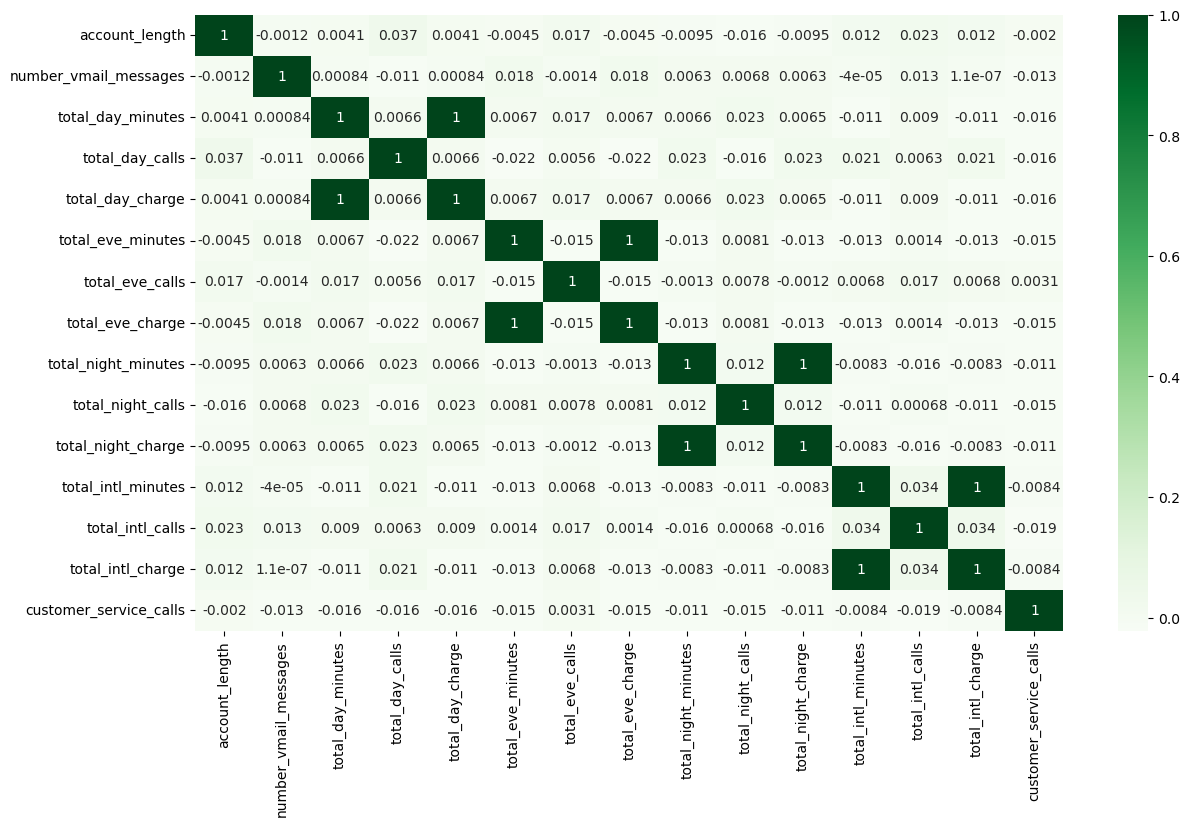

In [65]:
plt.figure(figsize=(14,8))
df.drop(["account_length", "area_code", "churn"], axis=1)
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

In [66]:
pd.crosstab(df["voice_mail_plan"], df["international_plan"])

international_plan,No,Yes
voice_mail_plan,,
No,2154,226
Yes,819,91
